We will try using Polars instead of classic Pandas.

Read all, hope MacBook will be sufficient

In [41]:
import polars as pl
df = pl.read_ndjson("../../data/meta_Electronics.jsonl", ignore_errors=True)


Print basic dataset info

In [6]:
print('Columns:')
print(df.columns)
print('Schema:')
print(df.schema)
print('Head:')
print(df.head(3))

print(f'Total rows: {df.height}')


Columns:
['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together']
Schema:
Schema({'main_category': String, 'title': String, 'average_rating': Float64, 'rating_number': Int64, 'features': List(String), 'description': List(String), 'price': Float64, 'images': List(Struct({'thumb': String, 'large': String, 'variant': String, 'hi_res': String})), 'videos': List(Struct({'title': String, 'url': String, 'user_id': String})), 'store': String, 'categories': List(String), 'details': Struct({'Brand': String, 'Color': String, 'Room Type': String, 'Material': String, 'Theme': String, 'Style': String, 'Age Range (Description)': String, 'Reusability': String, 'Pattern': String, 'Shape': String, 'Unit Count': String, 'Finish Type': String, 'Item Weight': String, 'Package Dimensions': String, 'Manufacturer': String, 'Country of Origin': String, 'Date First Available': String,

In [11]:
# print top 10 products by rating_number
X = 10
topX = df.select([
    "title", "main_category", "rating_number", "average_rating", "price"
]).sort("rating_number", descending=True).head(X)

print(topX)

shape: (10, 5)
┌─────────────────────────────────┬──────────────────────┬───────────────┬────────────────┬───────┐
│ title                           ┆ main_category        ┆ rating_number ┆ average_rating ┆ price │
│ ---                             ┆ ---                  ┆ ---           ┆ ---            ┆ ---   │
│ str                             ┆ str                  ┆ i64           ┆ f64            ┆ f64   │
╞═════════════════════════════════╪══════════════════════╪═══════════════╪════════════════╪═══════╡
│ Echo Dot (3rd Gen, 2018 releas… ┆ Amazon Devices       ┆ 1034896       ┆ 4.7            ┆ null  │
│ Fire TV Stick 4K streaming dev… ┆ Amazon Devices       ┆ 819630        ┆ 4.7            ┆ null  │
│ Apple AirPods (2nd Generation)… ┆ Apple Products       ┆ 585624        ┆ 4.7            ┆ 99.0  │
│ Echo Dot (4th Gen) | Smart spe… ┆ Amazon Devices       ┆ 584328        ┆ 4.7            ┆ null  │
│ Amazon Smart Plug, for home au… ┆ Amazon Devices       ┆ 542825        ┆ 4.7       

In [20]:
# bin by rating_number by 200 (see distro of most popular rating_range)
bin_size = 200

df_bins = (
    df
    .filter(pl.col("rating_number").is_not_null())
    .with_columns([
        (pl.col("rating_number") // bin_size * bin_size).alias("rating_bucket_start"),
    ])
    .with_columns([
        (pl.col("rating_bucket_start") + bin_size - 1).alias("rating_bucket_end"),
    ])
    .with_columns([
        (pl.col("rating_bucket_start").cast(pl.Utf8) + "–" + pl.col("rating_bucket_end").cast(pl.Utf8)).alias("rating_range")
    ])
    .group_by("rating_range")
    .agg(pl.count())
    .sort("count", descending=True)
)

print(df_bins.head(20).to_pandas())

/var/folders/md/7gpkv8112wb20p4c8cgp49c80000gn/T/ipykernel_11658/2075583753.py:16: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count())


   rating_range    count
0         0–199  1448002
1       200–399    67653
2       400–599    27111
3       600–799    14996
4       800–999     9614
5     1000–1199     6822
6     1200–1399     4986
7     1400–1599     3883
8     1600–1799     2961
9     1800–1999     2436
10    2000–2199     2103
11    2200–2399     1665
12    2400–2599     1430
13    2800–2999     1232
14    2600–2799     1190
15    3000–3199     1023
16    3200–3399      883
17    3400–3599      783
18    3600–3799      645
19    4000–4199      634


In [21]:
# 20000 most popular items
popular = (
    df
    .sort("rating_number", descending=True)
    .head(20_000)
)

popular.write_ndjson("../../data/meta_Electronics_top_20000.jsonl")

In [23]:
df_filtered = df.filter(pl.col("rating_number") > 50)

df_filtered.write_ndjson("../../data/meta_Electronics_over_50_reviews.jsonl")

In [99]:
import polars as pl
df_reviews = pl.read_ndjson("../../data/Electronics.jsonl", ignore_errors=True)


In [25]:
print('Columns:')
print(df_reviews.columns)
print('Schema:')
print(df_reviews.schema)
print('Head:')
print(df_reviews.head(3))

print(f'Total rows: {df_reviews.height}')

Columns:
['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
Schema:
Schema({'rating': Float64, 'title': String, 'text': String, 'images': List(Struct({'small_image_url': String, 'medium_image_url': String, 'large_image_url': String, 'attachment_type': String})), 'asin': String, 'parent_asin': String, 'user_id': String, 'timestamp': Int64, 'helpful_vote': Int64, 'verified_purchase': Boolean})
Head:
shape: (3, 10)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ rating ┆ title      ┆ text       ┆ images    ┆ … ┆ user_id   ┆ timestamp ┆ helpful_v ┆ verified_ │
│ ---    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ote       ┆ purchase  │
│ f64    ┆ str        ┆ str        ┆ list[stru ┆   ┆ str       ┆ i64       ┆ ---       ┆ ---       │
│        ┆            ┆            ┆ ct[4]]    ┆   ┆           ┆           ┆ i64       ┆ bool      │
╞═══════

In [26]:
unique_ratings = df_reviews.select(pl.col("rating").unique()).sort("rating")
print(unique_ratings)

shape: (6, 1)
┌────────┐
│ rating │
│ ---    │
│ f64    │
╞════════╡
│ 0.0    │
│ 1.0    │
│ 2.0    │
│ 3.0    │
│ 4.0    │
│ 5.0    │
└────────┘


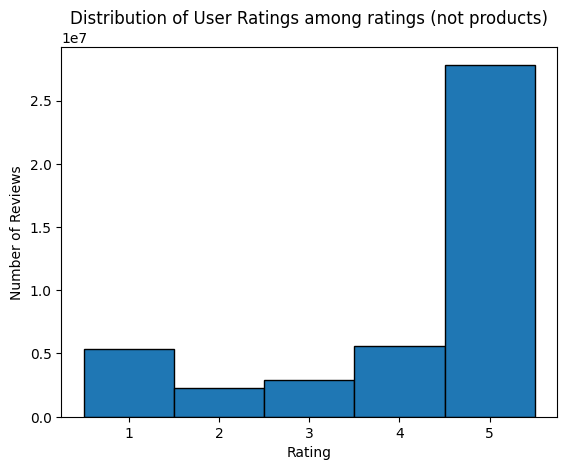

In [38]:
import matplotlib.pyplot as plt
df_pd = df_reviews.select("rating").drop_nulls().to_pandas()

plt.figure()
plt.hist(df_pd["rating"], bins=[1, 2, 3, 4, 5, 6], edgecolor="black", align='left') 
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of User Ratings among ratings (not products)")
# plt.grid(True)
plt.show()

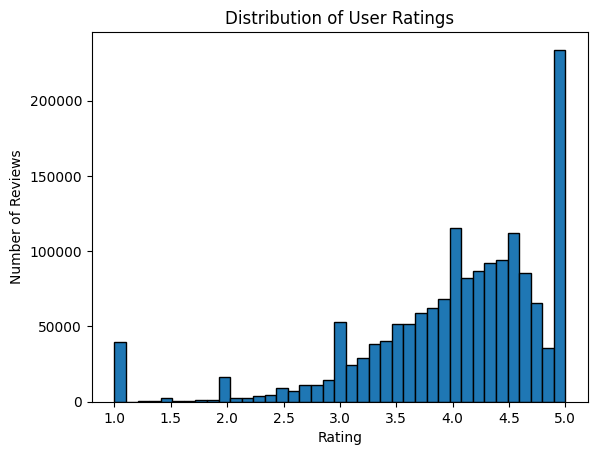

In [ ]:
df_pd = df.select("average_rating").drop_nulls().to_pandas()

plt.figure()
plt.hist(df_pd["average_rating"], bins=39, range=(1, 5), edgecolor="black", align='mid') 
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of User Ratings")
# plt.grid(True)
plt.show()

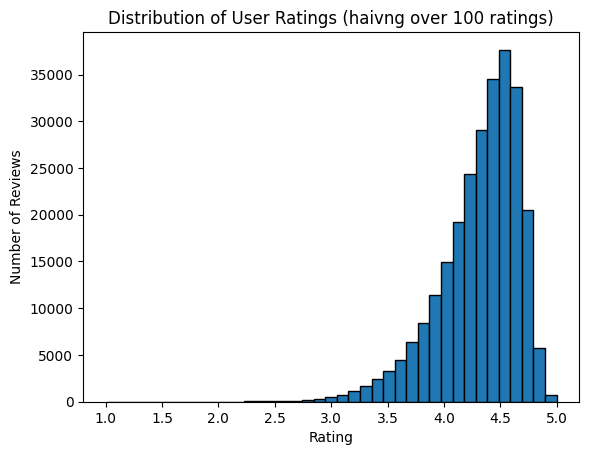

In [65]:
df_pd = df.filter(pl.col("rating_number") >= 100).select("average_rating").drop_nulls().to_pandas()

plt.figure()
plt.hist(df_pd["average_rating"], bins=39, range=(1, 5), edgecolor="black", align='mid') 
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of User Ratings (haivng over 100 ratings)")
# plt.grid(True)
plt.show()

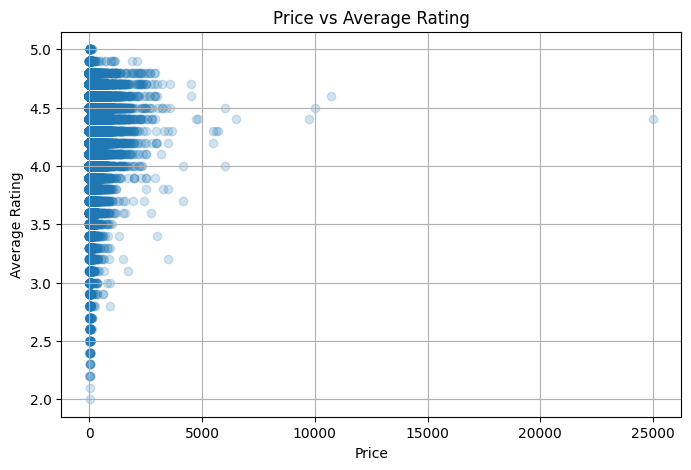

In [ ]:
import matplotlib.pyplot as plt
df_clean = df.filter(
    pl.col("price").is_not_null() &
    pl.col("average_rating").is_not_null() 
)
df_pd = df_clean.filter(pl.col("rating_number") > 100).select(["price", "average_rating"]).to_pandas()

plt.figure(figsize=(8, 5))
plt.scatter(df_pd["price"], df_pd["average_rating"], alpha=0.2)
plt.xlabel("Price")
plt.ylabel("Average Rating")
plt.title("Price vs Average Rating")
plt.grid(True)
plt.show()

In [69]:
correlation = df_clean.select([
    pl.corr("price", "average_rating")
])

print(correlation)

shape: (1, 1)
┌──────────┐
│ price    │
│ ---      │
│ f64      │
╞══════════╡
│ -0.01738 │
└──────────┘


Final preps for extracting the jsonl files:

In [105]:
from datetime import datetime
df_recent = (
    df
    .filter(pl.col("details").struct.field("Date First Available").is_not_null())
    .with_columns([
        pl.col("details").struct.field("Date First Available")
        .str.strptime(pl.Date, "%B %d, %Y", strict=False)
        .alias("available_date")
    ])
    .filter(pl.col("available_date") >= datetime(2022, 1, 1))
)
print("date ≥2022", df_filtered.height)

df_significant = df_recent.filter(pl.col("rating_number") > 100)
print("rating ≥100", df_significant.height)

df_sampled = df_significant.sample(n=1000, with_replacement=False, shuffle=True)
print("sampled", df_sampled.height)


df_sampled.write_ndjson("../../data/meta_Electronics_1000.jsonl")

parent_asins = df_sampled.select("parent_asin").unique()

df_reviews_filtered = df_reviews.join(parent_asins, on="parent_asin", how="inner")
print(df_reviews_filtered.head(10))

df_reviews_filtered.write_ndjson("../../data/Electronics_1000.jsonl")


date ≥2022 115841
rating ≥100 17984
sampled 1000
shape: (10, 10)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ rating ┆ title      ┆ text       ┆ images    ┆ … ┆ user_id   ┆ timestamp ┆ helpful_v ┆ verified_ │
│ ---    ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ote       ┆ purchase  │
│ f64    ┆ str        ┆ str        ┆ list[stru ┆   ┆ str       ┆ i64       ┆ ---       ┆ ---       │
│        ┆            ┆            ┆ ct[4]]    ┆   ┆           ┆           ┆ i64       ┆ bool      │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 5.0    ┆ CIYUPE     ┆ CIYUPE     ┆ []        ┆ … ┆ AHOEIYJJH ┆ 167128881 ┆ 1         ┆ true      │
│        ┆ Tablet     ┆ Tablet     ┆           ┆   ┆ Z7ITX75BO ┆ 2718      ┆           ┆           │
│        ┆ Pillow     ┆ Pillow     ┆           ┆   ┆ FQYNXVVJQ ┆           ┆           ┆           │
│        ┆ Stand, Ta… ┆ St

In [101]:
df_reviews.height


43886944

In [110]:
!jq 'if (input_line_number <= 10) then . else empty end' ../../data/Electronics_1000.jsonl

{
  "rating": 5.0,
  "title": "CIYUPE Tablet Pillow Stand, Tablet Holder (grey)",
  "text": "CIYUPE Tablet Pillow Stand, Tablet Holder Dock for Bed with 6 Viewing Angles, Compatible with iPad Pro 9.7, 10.5,12.9 Air Mini 4 3, Kindle, Galaxy Tab, E-Reader and Books (Grey). It is great at holding tablets and phones at whatever angle of its 6 possible positions is most appropriate. Comfortable to use, takes pressure off hands/wrists when using",
  "images": [],
  "asin": "B09V28Y3HH",
  "parent_asin": "B09V28Y3HH",
  "user_id": "AHOEIYJJHZ7ITX75BOFQYNXVVJQQ",
  "timestamp": 1671288812718,
  "helpful_vote": 1,
  "verified_purchase": true
}
{
  "rating": 3.0,
  "title": "Kinda hurts, but okay overall",
  "text": "They lose audio for like .5 seconds, every 20 minutes, I also thought the ear shape would be useful but it actually hurts my ear somewhat, If i use for more than an hour",
  "images": [],
  "asin": "B09R5HG53K",
  "parent_asin": "B0B9HR3T4B",
  "user_id": "AHBPNB4OFDSGKU7UM5IATLVSPG